In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Reading the dataset in python Environment

In [3]:
iris_data=pd.read_excel("iris_3.xls")

In [4]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# it has " Nan" values , so we need so preprocessing 

In [6]:
iris_data.shape  # gives the shape osf the dataset, No. of rows and columns

(150, 5)

In [7]:
# we are taking the information os the  given dataset 

In [8]:
iris_data.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# checking  for the null values

In [10]:
iris_data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
#SL has 7 null values,Sw has 6 and PL has 6

In [12]:
# we will findout the datatype of the given dataset

In [13]:
iris_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [14]:
# SL,SW,PL,PW has float values. But classificatioin has categorical value

In [15]:
# so we are finding out how many unique values are there in Classification column

In [16]:
iris_data['Classification'].nunique()

3

In [17]:
# Classification has 3 unique values, 

In [18]:
# we are finding the 3 unique values in classification

In [19]:
iris_data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

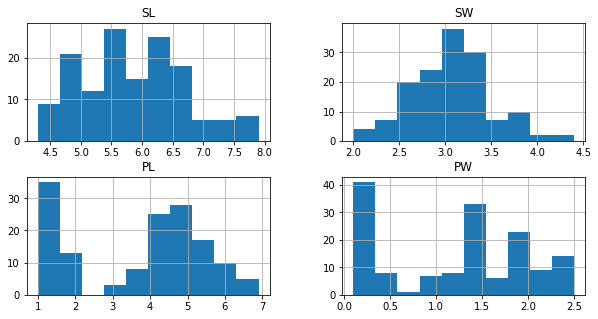

In [20]:
freqgraph = iris_data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [21]:
# handling the null values

In [ ]:
# finding the column name

In [22]:
col =iris_data.columns
col

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [23]:
for col in['SL', 'SW', 'PL', 'PW']:
    iris_data[col] = iris_data[col].fillna(iris_data[col].mean())

In [24]:
iris_data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [25]:
# there are no null values

In [26]:
# drawing the boxplot to check for outliers

Text(0.5, 1.0, 'BOX plot of SL')

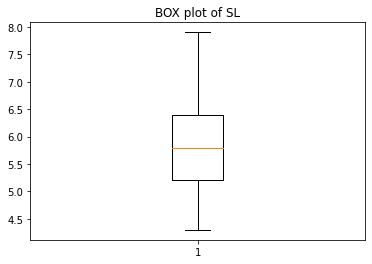

In [27]:
plt.boxplot(iris_data['SL'])
plt.title("BOX plot of SL")

Text(0.5, 1.0, 'BOX plot of SW')

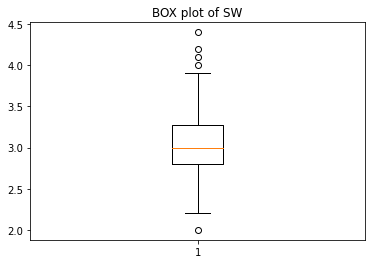

In [28]:
plt.boxplot(iris_data['SW'])
plt.title("BOX plot of SW")

In [29]:
# Managing outliers

In [30]:
Q1 =np.percentile(iris_data['SW'],25,interpolation='midpoint')
Q2 =np.percentile(iris_data['SW'],50,interpolation='midpoint')
Q3 =np.percentile(iris_data['SW'],75,interpolation='midpoint')

In [31]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [32]:
iris_data['SW'].median()

3.0

In [33]:
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [34]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [35]:
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [36]:
outlier =[]
for x in iris_data['SW']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [37]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [38]:
ind=iris_data['SW']>up_lim

In [39]:
iris_data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [40]:
# to drop the outliers

In [41]:
#iris_data.drop([14, 15, 32, 33],inplace=True)

In [42]:
#it is a small set of data set ,so droping rows may effect the information

In [43]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [44]:
# Sepal Width has outliers, we have to handle outliers

Text(0.5, 1.0, 'BOX plot of PL')

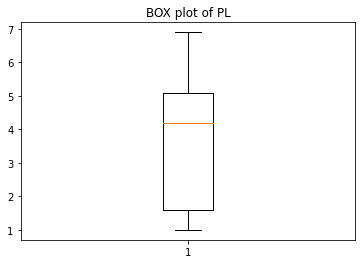

In [45]:
plt.boxplot(iris_data['PL'])
plt.title("BOX plot of PL")

Text(0.5, 1.0, 'BOX plot of PW')

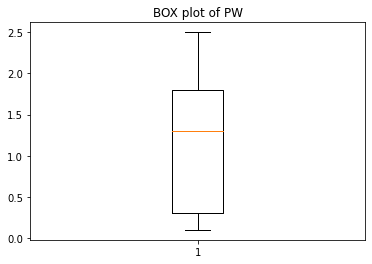

In [46]:
plt.boxplot(iris_data['PW'])
plt.title("BOX plot of PW")

In [47]:
#replace_map = {'Classification': {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica': 3}}

In [48]:
#iris_data.replace(replace_map, inplace=True)

#print(iris_data.head())

In [49]:
iris_data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [50]:
iris_data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [52]:
#label encoding for the column "classification"

In [53]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [54]:
iris_data['Classification'] = lab_enc.fit_transform (iris_data['Classification'])

In [55]:
# one hot encoding for the column Classification

In [56]:
#iris_data = pd.get_dummies(iris_data)

In [57]:
#iris_data.head()

In [58]:
iris_data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667,1.000000
std,0.808480,0.421884,1.725479,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [59]:
# importing test and train data libraries

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# spliting target and feature - 2 methods

In [62]:
#method 1
#Prepare the training set  

# X = feature values, all the columns except the last column
#X = iris_data.iloc[:, :-1]

# y = target values, last column of the data frame
#y = iris_data.iloc[:, -1]

In [63]:
# second method of target n feature 
X = iris_data.drop('Classification',axis=1)
y = iris_data['Classification']

In [64]:
# train and test data

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [67]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

In [68]:
# classsification model

# Logistic Regression- Model 1

In [69]:
from sklearn.linear_model import LogisticRegression


In [70]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train,y_train)
y_pred_logit =logit_model.predict(X_test)

In [71]:
y_pred_logit

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [72]:
#confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [75]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int32

In [76]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [77]:
precision_score(y_test,y_pred_logit ,average='micro')

1.0

In [78]:
recall_score(y_test,y_pred_logit,average='micro')

1.0

In [79]:
accuracy_score(y_test,y_pred_logit)

1.0

# KNN model- Model2

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
metric_k =[]
neighbors = range(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [82]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

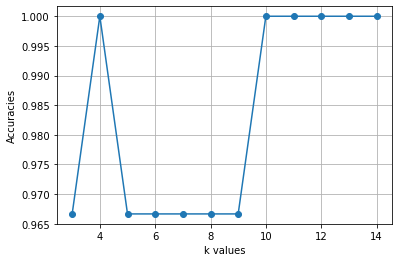

In [83]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("k values")
plt.ylabel("Accuracies")
plt.grid()

In [84]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train,y_train)
y_pred_kNN = classifier.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred_kNN)

0.9666666666666667

In [86]:
# Accuracy for KNN model is 0.9666667

In [87]:
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [88]:
precision_score(y_test,y_pred_kNN, pos_label='positive',
                                           average='micro')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9666666666666667

In [89]:
recall_score(y_test,y_pred_kNN, average='micro')

0.9666666666666667

# MinMax scaling

In [90]:
# doing min max scaling and checking the accuracy of linear regression , KNN,SVM,RBF,Decission tree and random forest

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
# Classification is a categorical value so not doing scaling

In [93]:
X2 = iris_data['Classification']  # Assigning categorical value in one variable

In [94]:
X1=iris_data.drop(['Classification'],axis=1)  # asiiging variable with the field to be scaled

In [95]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [96]:
X1 = min_max_scaler.fit_transform(X1)

In [97]:
type(X1)

numpy.ndarray

In [98]:
X1= pd.DataFrame(X1,columns=['SL','SW','PL','PW'])

In [99]:
X1.head()

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.432207,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [100]:
iris_data1= pd.concat([X1,X2],axis=1)

In [101]:
X1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.432207,0.437211,0.467161,0.457778
std,0.224578,0.175785,0.292454,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.542373,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [102]:
#Minmax scaled data

In [103]:
iris_data1.head()

,SL,SW,PL,PW,Classification
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.432207,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [104]:
iris_data1.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.432207,0.437211,0.467161,0.457778,1.000000
std,0.224578,0.175785,0.292454,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.542373,0.500000,1.000000
75%,0.583333,0.531250,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


# Logistic Regression after minmax scaling

In [105]:
# using scaled data for classification

In [106]:
X=iris_data1.drop(['Classification'],axis=1)
y=iris_data1['Classification']

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train,y_train)
y_pred_logit =logit_model.predict(X_test)

In [109]:
y_pred_logit

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [110]:
#confusion matrix

In [111]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [112]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int32

In [113]:
precision_score(y_test,y_pred_logit ,average='micro')

1.0

In [114]:
recall_score(y_test,y_pred_logit ,average='micro')

1.0

In [115]:
accuracy_score(y_test,y_pred_logit)

1.0

In [116]:
# there is no change in acuuracy after doing minmax scaling, already we got accuracy 100% or 1 for logistic regression model

# KNN model after minmax scaling

In [117]:
metric_k =[]
neighbors = range(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [118]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

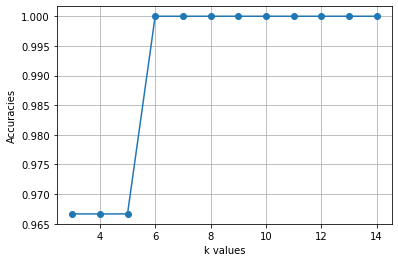

In [119]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("k values")
plt.ylabel("Accuracies")
plt.grid()

In [120]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train,y_train)
y_pred_kNN = classifier.predict(X_test)

In [121]:
accuracy_score(y_test,y_pred_kNN)

0.9666666666666667

In [122]:
# The accuracy after doing minmax scaling there is no change in the value .It remains the same

In [123]:
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [124]:
precision_score(y_test,y_pred_kNN, pos_label='positive',
                                           average='micro')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9666666666666667

In [125]:
recall_score(y_test,y_pred_kNN, average='micro')

0.9666666666666667

# linear kernel- Model 3

In [126]:
from sklearn.svm import SVC

In [127]:
X = iris_data.drop('Classification',axis=1)
y = iris_data['Classification']

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [129]:
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train,y_train)
y_pred_svm = svm_clf.predict(X_test)

In [130]:
# creating confusion matrix

In [131]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [132]:
accuracy_score(y_test,y_pred_svm)

1.0

In [133]:
# accuracy is 1 or 100% for SVM also

In [134]:
# checking SVM  with scaled data 

In [135]:
X=iris_data1.drop(['Classification'],axis=1)
y=iris_data1['Classification']

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
svm_clf1 = SVC(kernel='linear')
svm_clf1 = svm_clf1.fit(X_train,y_train)
y_pred_svm1 = svm_clf1.predict(X_test)

In [138]:
# creating confusion matrix

In [139]:
confusion_matrix(y_test,y_pred_svm1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [140]:
accuracy_score(y_test,y_pred_svm1)

1.0

# changing the kernel creating with radial base function-- Model 4

In [141]:
X = iris_data.drop('Classification',axis=1)
y = iris_data['Classification']

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [143]:
svm_clf2 = SVC(kernel='rbf')
svm_clf2 = svm_clf2.fit(X_train,y_train)
y_pred_svm2 = svm_clf2.predict(X_test)

In [144]:
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [145]:
accuracy_score(y_test,y_pred_svm2)

1.0

In [146]:
# accuracy is 1 for Radial base function

In [147]:
# Checking rbf with scaled data

In [148]:
X=iris_data1.drop(['Classification'],axis=1)
y=iris_data1['Classification']

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [150]:
svm_clf3 = SVC(kernel='rbf')
svm_clf3 = svm_clf3.fit(X_train,y_train)
y_pred_svm3 = svm_clf3.predict(X_test)

In [151]:
confusion_matrix(y_test,y_pred_svm3)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [152]:
accuracy_score(y_test,y_pred_svm3)

0.9666666666666667

In [153]:
#Decission Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
X = iris_data.drop('Classification',axis=1)
y = iris_data['Classification']

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [157]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)

In [158]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [159]:
accuracy_score(y_test,y_pred_dt)

1.0

In [160]:
# for decission tree also accuracy is 1

In [161]:
# checking accuracy in decission tree with scaled data

In [162]:
X=iris_data1.drop(['Classification'],axis=1)
y=iris_data1['Classification']

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [164]:
dt_clf1 = DecisionTreeClassifier()
dt_clf1 = dt_clf1.fit(X_train,y_train)
y_pred_dt1 = dt_clf1.predict(X_test)

In [165]:
confusion_matrix(y_test,y_pred_dt1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [166]:
accuracy_score(y_test,y_pred_dt1)

1.0

# random forest  - Model 5

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
X = iris_data.drop('Classification',axis=1)
y = iris_data['Classification']

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [170]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)

In [171]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [172]:
accuracy_score(y_test,y_pred_rf)

1.0

In [173]:
X=iris_data1.drop(['Classification'],axis=1)
y=iris_data1['Classification']

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [175]:
rf_clf1 = RandomForestClassifier()
rf_clf = rf_clf1.fit(X_train,y_train)
y_pred_rf1 = rf_clf1.predict(X_test)

In [176]:
confusion_matrix(y_test,y_pred_rf1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [177]:
accuracy_score(y_test,y_pred_rf1)

1.0

In [178]:
# accuracy is 1 for random forest

In [ ]:
# Finding - All the models have acuuracy 1 other than KNN model which has a frequency 0.9666667.
# so we can accept all the models except KNN
#scaling also doesn't make any diffrence in KNN accuracy too